In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from functools import reduce
from scipy.linalg import sqrtm
from mpl_toolkits.mplot3d import Axes3D
import math
import sympy
from numpy.linalg import matrix_rank

In [2]:
### r_1 and r_2 is lower and upper bound for the distance of each point. ###
### (x_1,x_2) is the center. p is the number of points. ###

def circle(r_1,r_2,x_1,x_2,p):
    
    ### radius of the circle ###
    r = r_1 + ((r_2 - r_1) * np.random.random((p,1)))

    ### center of the circle (x, y) ###
    circle_x = x_1 
    circle_y = x_2
    
    ### random angle ###
    alpha = 2 * np.pi * np.random.random((p,1))
    
    ### calculating coordinates ###
    x = (r * np.cos(alpha) + circle_x).reshape((p, 1)) 
    y = (r * np.sin(alpha) + circle_y).reshape((p, 1))
    L = np.arange(p).reshape((p,1))
    
    data = np.concatenate((x, y, L), axis=1)
   
    
    return data;

def remove_duplicates(x):
    
    y = []
    
    for i in x:
        if i not in y:
            y.append(i)

    return y

[[-0.21041757  2.74222752  0.        ]
 [ 2.63230105  1.06197415  1.        ]
 [-0.18746274  2.83840062  2.        ]
 [-1.24422773  2.53385234  3.        ]
 [-2.47860329 -1.27746609  4.        ]
 [ 2.87645227 -0.30661783  5.        ]
 [-1.31640927 -2.63322654  6.        ]
 [-2.66716167  1.18604744  7.        ]
 [-2.66565906 -1.30133643  8.        ]
 [ 1.23598468 -2.56655889  9.        ]
 [ 2.97037484 -0.02504646 10.        ]
 [-2.5641778  -1.37953859 11.        ]
 [ 0.83821882 -2.77463261 12.        ]
 [ 1.17968849 -2.49901084 13.        ]
 [-2.7319141   0.78184632 14.        ]
 [-2.85042896 -0.662787   15.        ]
 [-1.21065154  2.73560673 16.        ]
 [-0.06425955 -2.77164401 17.        ]
 [-1.46009893  2.39379865 18.        ]
 [-0.85053307  2.6763836  19.        ]]


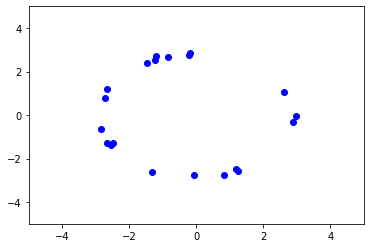

In [3]:
### Sample Data ###

Class_1 = circle(2.7,3,0,0,20)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.scatter(Class_1.T[0], Class_1.T[1], color="blue", label="points") 
 
print(Class_1)    
plt.show()

In [4]:
### V_d is the data set that contains (x_i,y_i) and label i. Radius is given in terms of e. 

def rc_one_simplex(V_d,e):
    
    edges = []
    x_cord = []
    y_cord = []
    
    dim = [x for x in range(len(V_d))]
    
### Check if vertices should be connected via an edge ###
    
    for i in dim:
        for j in dim:
            x_i = V_d[i][0]
            y_i = V_d[i][1]
            x_j = V_d[j][0]
            y_j = V_d[j][1]
            
### Compare Pairwise distances ##
            
            d = np.array([x_i,y_i])-np.array([x_j,y_j])
            if np.linalg.norm(d) < 2*e and np.linalg.norm(np.array(d)) > 0:
                
### Append edges into a list and plot line segments ###
            
                if i<j:
                    edges.append([i,j])
                    x_cord.extend([x_i,x_j])
                    y_cord.extend([y_i,y_j])
                    plt.plot([x_i,x_j], [y_i,y_j], 'ro-')
                    
                else:
                    edges.append([j,i])
                    x_cord.extend([x_j,x_i])
                    y_cord.extend([y_j,y_i])
                    plt.plot([x_j,x_i], [y_j,y_i], 'ro-')
                    
### Remove Duplicates ###           

    edges = remove_duplicates(edges)
    
    
    plt.show()
    
    return edges;


In [5]:
def simplex_decomposion(simplex):
    
    decompose = []

### Map a simplex from C_(l) -> C_(l-1) ###
    
    for i in range(len(simplex)):
        for j in simplex:
            if j != simplex[i]:
                decompose.append(j)
                
### Decompose n-simplex into (n-1)-simplex ###
                
    decompose = np.array_split(decompose, len(simplex))
    decompose = [list(i) for i in decompose]
    decompose = remove_duplicates(decompose)

    return decompose
            
        

In [6]:
def simplex_builder(simplicies):
    
    guess = []
    guess_update = []
    rand = []
    decomposition = []
    
### Gluing edges together to form larger simplicies ###
    
    for i in simplicies:
        for j in simplicies:
            if i != j:
                for k in range(1,len(i)):
                    if i[k] in j and i[k] not in rand:
                        rand.append(i[k])
                        rand.append(i[0])
                        rand.append(j[len(j)-1])
                    
### Reorganize larger simplicies ###

                    rand = remove_duplicates(rand)
                    rand.sort()
                    
                guess.append(rand)
                rand = []
                
### List of potential guess ###
                
    for i in guess:
        if len(i) == (len(simplicies[0])+1):
            guess_update.append(i)
    
    guess_update = remove_duplicates(guess_update)
    
### Check to see if the decomposition exists in the orignal list. If valid, included; else, remove. ###
    
    for i in guess_update:
        for j in simplex_decomposion(i):
            if j not in simplicies:
                guess_update.remove(i)
                break
                
                
    decomposition = remove_duplicates(guess_update)

    return decomposition

In [7]:
def Rips_Complex(times, data):
    
    result = []
    Complex = []
    
    skeleton = []
    skeleton.append(data)
    
### Result the one-complex ###

    if times == 1:
        result.append(data)
        
### Recursively builder larger simplicies using builder function and then append ###

    else:
        result.append(data)
        result.extend(Rips_Complex(times-1, simplex_builder(data)))
    for i in result:
        if (len(i) != 0) and (i not in Complex):
            Complex.append(i)
    
    return Complex;

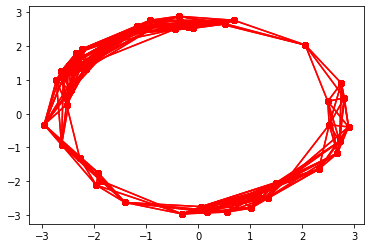

[[ 2.7218939  -0.81883525  0.        ]
 [-2.73208898  0.98203615  1.        ]
 [-0.73937021  2.65334536  2.        ]
 [ 0.0593184  -2.75038519  3.        ]
 [-2.63116836 -0.92143442  4.        ]
 [-2.15444361  1.33142238  5.        ]
 [ 2.81120153  0.4668073   6.        ]
 [-2.63241776  1.27237413  7.        ]
 [ 0.68726396  2.76292244  8.        ]
 [ 2.31944701 -1.64168042  9.        ]
 [ 1.14576777 -2.39592825 10.        ]
 [-1.96237165 -2.11482579 11.        ]
 [-0.92674622  2.76246664 12.        ]
 [-2.27940878 -1.3217691  13.        ]
 [-2.44857111  0.69275242 14.        ]
 [-0.37868216  2.88202336 15.        ]
 [ 2.89217135 -0.39222198 16.        ]
 [-2.35494249  1.78202509 17.        ]
 [-1.47747673  2.34050923 18.        ]
 [ 1.48923462 -2.05126503 19.        ]
 [ 2.52031147 -0.32641471 20.        ]
 [-2.11270552  1.4797156  21.        ]
 [-1.87910715 -1.98144563 22.        ]
 [-2.24676698  1.90727451 23.        ]
 [-2.32862069  1.59121542 24.        ]
 [-2.49709257  1.44823294

In [8]:
### Dataset ###

Class_1 = circle(2.5,3,0,0,50)



### The Skeleton ###

x = rc_one_simplex(Class_1, 1)

### For smaller complex set size < len(x). ###
### Else, for the entire simplical complex set times = len(x). ###

RC = Rips_Complex(2,x)

print(Class_1)

In [9]:
def boundary_maps(RC):
    
    l = len(RC)
    
    boundary_maps = []
    
    vertex = []

    for i in range(len(RC[0])):
        for j in range(2):
            if [RC[0][i][j]] not in vertex:
                vertex.append([RC[0][i][j]])

    RC.insert(0, vertex)

    for i in range(l):
        boundary_matrix = [ [ 0 for j in range(len(RC[i+1])) ] for k in range(len(RC[i])) ]
        
        for m in range(len(RC[i])):
            for n in range(len(RC[i+1])):
                if RC[i][m] in simplex_decomposion(RC[i+1][n]):
                    boundary_matrix[m][n] = 1
                    
        boundary_maps.append(boundary_matrix)
        
    
    return boundary_maps

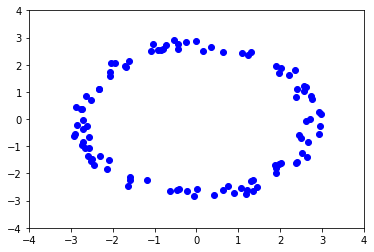

In [10]:
### Dataset ###

Class_1 = circle(2.5,3,0,0,100)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(Class_1.T[0], Class_1.T[1], color="blue", label="points") 
 
    
plt.show()

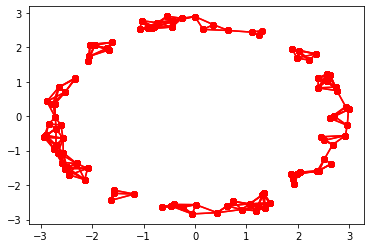

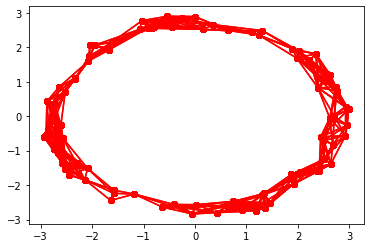

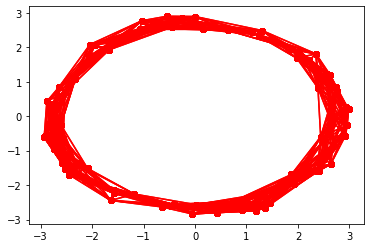

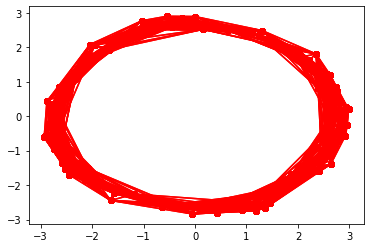

In [11]:
### The Skeleton ###

y = [0.25, 0.5, 0.75, 1]

for i in y:

    x = rc_one_simplex(Class_1, i)

    ### For smaller complex set size < len(x). ###
    ### Else, for the entire simplical complex set times = len(x). ###

    RC = Rips_Complex(2,x)